## Research questions 3

In [1]:
import pandas as pd
import numpy as np
from numpy import histogram as hist
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
df_posts=pd.read_csv('/home/ec2-user/instagram_posts.zip', sep='\t',usecols=['cts'])

### RQ3-SECOND QUESTION
-Create a function that receives a time intervals list as a parameter and returns a plot with 
the number of posts for each given interval.-

the input intervals list is assumed to be of the form below:

input_intervals=['06:00:00','10:59:59','11:00:00','13:59:59',...,'23:59:59','00:00:00','2:59:59','03:00:00','5:59:59']

intervals_sort manipulates the list input_intervals in order to prform the algorithm function_RQ3;

counter_original_intervals reorders the values used by the function function_RQ3 relative to the input intervals.

In [3]:
def intervals_sort(input_intervals):
   l=input_intervals[::2]
   num_intervals=len(l)
   
   list_variable=[]
   variable=[0,0,0]

   for i in range(num_intervals):
       variable=list(map(str,l[i].split(':')))
       list_variable.append(int('9'+variable[0]+variable[1]+variable[2]))
        
   list_variable.sort()
   output_intervals=[] 
      
   for i in range(num_intervals):
       variable=str(list_variable[i])[1:]
       output_intervals.append((('0'+variable[:-4])[-2:]+':'+('0'+variable[-4:-2])[-2:]+':'+('0'+variable[-2:])[-2:])) 
    
   return output_intervals,num_intervals


def counter_original_intervals(input_intervals,output_intervals,output_counter):
   l=input_intervals[::2]
   j=0
   while l[0]!=output_intervals[j]:
       j+=1  
   input_counter=output_counter[j:]+output_counter[:j] 
   return  input_counter 

In [4]:
def function_RQ3(input_intervals,df_posts):
  output_intervals,num_intervals=intervals_sort(input_intervals)  
  
  intervals_initial_time=[]
  variable=[0,0,0]
  
    
  for i in range(num_intervals):
       variable=list(map(str,output_intervals[i].split(':')))       
       intervals_initial_time.append(int(variable[0]+variable[1]+variable[2]))
   
  counter=list(np.zeros(num_intervals,int))
  df_posts_local=df_posts.fillna('') 
  '''
  it's usefull to fill the missin value with the string ''
  '''
  for i in range(len(df_posts_local)):        
    date_time=df_posts_local.loc[i][0]
    '''
    First elemnt of the i-th row of the DataFrame object post_time.
    The 'cts' record, so the one stored in post_time, is a string with the structure DATE_TIME , 
    where '_' it'a a space, I'm interested to the TIME with is write HOUR:MIN:SEC
    '''
    if date_time!='':
        time=((date_time.split())[1]).split(':')
        
        t_current=int(time[0]+time[1]+time[2][:2])
                    
        
        if (intervals_initial_time[-1]<=t_current) or (t_current<intervals_initial_time[0]):
            counter[-1]+=1
        else:
            j=0
            while not(intervals_initial_time[j]<=t_current<intervals_initial_time[j+1]): 
                j+=1
            counter[j]+=1
            
  input_counter=counter_original_intervals(input_intervals,output_intervals,counter)   
  bins=np.linspace(1, num_intervals,num_intervals,dtype=int)
  plt.bar(bins,input_counter, width=0.1)
  plt.show()
  return counter,num_intervals

### RQ3-FIRST QUESTION
-What is the most common time in which users publish their posts?-

In [ ]:
day_hours=[]
for i in range(24):
    day_hours.append(('0'+str(i))[-2:]+':00:00')
    day_hours.append(('0'+str(i))[-2:]+':59:59')
'''
day_hours is a list of intervals whose time span is one hour, and the intial time of the first interval is 00:00:00
'''
counter_day_hours,num_intervals_day_hours=function_RQ3(day_hours,df_posts)

In [ ]:
index_common_time=2*counter_day_hours.index(max(counter_day_hours))
print('The most common time in which users publish their posts is:')
print(day_hours[index_common_time],'-->',day_hours[index_common_time+1])

### RQ3-THIRD QUESTION
-Use the function that you created in the previous literal to plot the number of posts between the following time intervals:-

|Initial time|Final time|
|------|------|
|06:00:00|10:59:59|
|11:00:00|13:59:59|
|14:00:00|16:59:59|
|17:00:00|19:59:59|
|20:00:00|23:59:59|
|00:00:00|02:59:59|
|03:00:00|05:59:59|


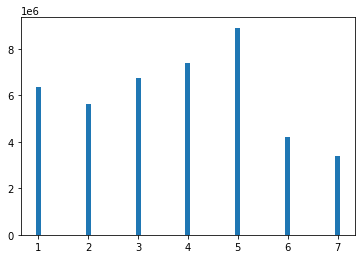

[4213617, 3411223, 6378572, 5614715, 6763037, 7409907, 8915794]


In [5]:
input_intervals=['06:00:00','10:59:59','11:00:00','13:59:59','14:00:00','16:59:59','17:00:00','19:59:59','20:00:00','23:59:59','00:00:00','2:59:59','03:00:00','5:59:59']
counter_intervals,num_intervals=function_RQ3(input_intervals,df_posts)
print(counter_intervals)